In [2]:
import pandas as pd
import numpy as np
import pandas_profiling

#Import libs
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

print("Setup Complete")

Setup Complete


In [3]:
#Data Load
#-------------- Kaggle 2020 ---------------------
kaggle2020File = "2020_kaggle_survey_2020_responses.csv"
kaggle2020 = pd.read_csv(kaggle2020File)
descriptions = kaggle2020.loc[0:1,:]
kaggle2020 = kaggle2020.loc[1:,:]

#-------------- Kaggle 2019 ---------------------
kaggle2019File = '2019_multiple_choice_responses.csv'
kaggle2019 = pd.read_csv(kaggle2019File)
kaggle2019 = kaggle2019.loc[1:,:]

#-------------- Kaggle 2018 ---------------------
kaggle2018File = '2018_multipleChoiceResponses.csv'
kaggle2018 = pd.read_csv(kaggle2018File)
kaggle2018 = kaggle2018.loc[1:,:]


print("Data loaded")
pd.set_option('display.max_columns', None)

In [11]:
figtext_arg = dict(
            horizontalalignment='center',
            fontsize=12,
            wrap=True,
            alpha=0.65
)

In [4]:
kaggle2020.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [5]:
## Data preparation 2020

#Single choice questions
single = ['Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q15', 'Q20', 'Q21', 'Q24']

#Multiple choice questions
multi = ['Q7', 'Q14', 'Q16', 'Q17','Q23', 'Q31_A', 'Q37', 'Q39']

selected_columns = single

for m in multi:
    i = 1
    while True:
        qPart = (m+"_Part_"+str(i))
        if qPart not in kaggle2020.columns:
            break
        selected_columns.append(qPart)
        i = i+1
    if m+"_OTHER" in kaggle2020.columns:
        selected_columns.append(m+"_OTHER")

kaggle2020 = kaggle2020.loc[:,selected_columns]
kaggle2020.rename(
    columns={
        "Q1":"Age", 
        "Q2":"Gender", 
        "Q3":"Country", 
        "Q4":"Education Level", 
        "Q5":"Role", 
        "Q6":"Programming Experience", 
        "Q8":"Recommended First Language", 
        "Q15":"ML Experience", 
        "Q20":"Company Size", 
        "Q21":"Company Data Scientists", 
        "Q24":"Yearly Compensation"
    }, inplace=True)
#kaggle2020 = kaggle2020.loc[(kaggle2020.Role.isin(['Data Scientist','Student']))]
print("Kaggle 2020 data loaded")

Kaggle 2020 data loaded


In [6]:
## Data preparation 2019

#Single choice questions
selected_columns = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7', 'Q10','Q15', 'Q23']
kaggle2019 = kaggle2019.loc[:,selected_columns]
kaggle2019.rename(
    columns={
        "Q1":"Age", 
        "Q2":"Gender", 
        "Q3":"Country", 
        "Q4":"Education Level", 
        "Q5":"Role", 
        "Q6":"Company Size", 
        "Q7":"Company Data Scientists", 
        "Q10":"Yearly Compensation", 
        "Q15":"Programming Experience", 
        "Q23":"ML Experience"
    }, inplace=True)
print("Kaggle 2019 data loaded")

Kaggle 2019 data loaded


In [7]:
## Data preparation 2018

#Single choice questions
selected_columns = ['Q1','Q2','Q3','Q4','Q6','Q9', 'Q25']
kaggle2018 = kaggle2018.loc[:,selected_columns]
kaggle2018.rename(
    columns={
        "Q1":"Gender", 
        "Q2":"Age", 
        "Q3":"Country", 
        "Q4":"Education Level", 
        "Q6":"Role",
        "Q9":"Yearly Compensation",
        "Q25":"ML Experience"
    }, inplace=True)
print("Kaggle 2018 data loaded")

Kaggle 2018 data loaded


In [8]:
def percent(row, total):
    row.Percent = (row.Count/total[row.Year])
    return row

In [9]:
ages2020 = kaggle2020[['Age', 'Gender']]

#[Year, Gender]
agesPerYear = pd.concat([
    ages2020.Gender.value_counts(), kaggle2019.Gender.value_counts(),  kaggle2018.Gender.value_counts()], 
    keys=['2020', '2019', '2018'], 
    names=["Year", "Gender"]
).reset_index(name="Count")

agesPerYear = agesPerYear.replace({'Male':'Man', 'Female':'Woman'})

agesPerYearSum = agesPerYear.groupby('Year').Count.sum()

agesPerYear['Percent'] = pd.Series(dtype='float64')
agesPerYear = agesPerYear.apply(percent, args=(agesPerYearSum,), axis=1)
agesPerYear = agesPerYear.sort_values(by=['Year','Percent'], ascending=[True, False])
agesPerYear.loc[(agesPerYear.Year == '2020')][['Gender','Count']].sort_values('Count')

,Gender,Count
4,Nonbinary,52
3,Prefer to self-describe,54
2,Prefer not to say,263
1,Woman,3878
0,Man,15789


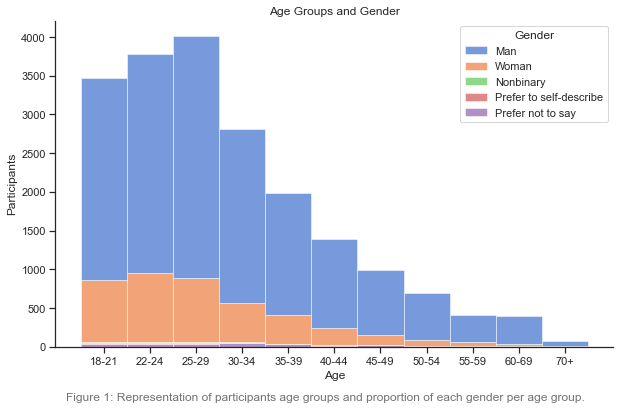

In [12]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,6))
sns.despine(f)

ages2020 = ages2020.sort_values(by=['Age','Gender'])
sns.histplot(
    ages2020,
    x="Age", hue="Gender", hue_order=['Man','Woman', 'Nonbinary','Prefer to self-describe', 'Prefer not to say'],
    multiple="stack",
    palette="muted",
    log_scale=False,
    linewidth= .5
)

plt.ylabel('Participants')

plt.title("Age Groups and Gender")

plt.figtext(0.5,0,
            "Figure 1: Representation of participants age groups and proportion of each gender per age group.",
            **figtext_arg
           )
plt.show()

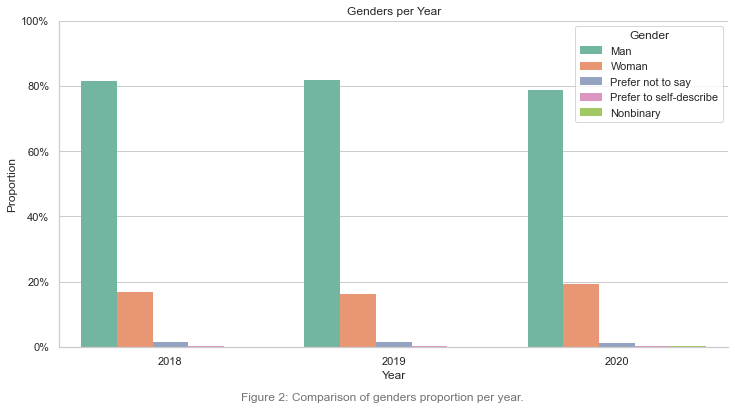

In [13]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")

bars = sns.barplot(
    data=agesPerYear,
    x='Year', y='Percent', hue='Gender',
    order=['2018','2019','2020'],
    palette="Set2",
    linewidth= 0
)
sns.despine(left=False)
bars.set_ylim(0, 1)

bars.yaxis.set_major_locator(mticker.FixedLocator(bars.get_yticks().tolist()))
yTicksLabels = ['{:.0%}'.format(x) for x in bars.get_yticks()]
bars.set_yticklabels(yTicksLabels)

plt.ylabel('Proportion')

plt.title('Genders per Year')
plt.figtext(0.5,0,
            "Figure 2: Comparison of genders proportion per year.",
            **figtext_arg
           )

plt.show()

In [14]:
countries = kaggle2020.loc[(kaggle2020.Country != "Other")].Country.value_counts().reset_index(name="Count").sort_values(by=["Count"], ascending=False).rename(columns={"index":"Country"})

countriesCodes = {
    'Argentina':'ARG',
    'Australia':'AUS',
    'Bangladesh':'BGD',
    'Belarus':'BLR',
    'Belgium':'BEL',
    'Brazil':'BRA',
    'Canada':'CAN',
    'Chile':'CHL',
    'China':'CHN',
    'Colombia':'COL',
    'Egypt':'EGY',
    'France':'FRA',
    'Germany':'DEU',
    'Ghana':'GHA',
    'Greece':'GRC',
    'India':'IND',
    'Indonesia':'IDN',
    'Iran, Islamic Republic of...':'IRN',
    'Ireland':'IRL',
    'Israel':'ISR',
    'Italy':'ITA',
    'Japan':'JPN',
    'Kenya':'KEN',
    'Malaysia':'MYS',
    'Mexico':'MEX',
    'Morocco':'MAR',
    'Nepal':'NPL',
    'Netherlands':'NLD',
    'Nigeria':'NGA',
    'Other':'',
    'Pakistan':'PAK',
    'Peru':'PER',
    'Philippines':'PHL',
    'Poland':'POL',
    'Portugal':'PRT',
    'Republic of Korea':'KOR',
    'Romania':'ROU',
    'Russia':'RUS',
    'Saudi Arabia':'SAU',
    'Singapore':'SGP',
    'South Africa':'ZAF',
    'South Korea':'PRK',
    'Spain':'ESP',
    'Sri Lanka':'LKA',
    'Sweden':'SWE',
    'Switzerland':'CHE',
    'Taiwan':'TWN',
    'Thailand':'THA',
    'Tunisia':'TUN',
    'Turkey':'TUR',
    'Ukraine':'UKR',
    'United Arab Emirates':'ARE',
    'United Kingdom of Great Britain and Northern Ireland':'GBR',
    'United States of America':'USA',
    'Viet Nam':'VNM'
}

def countryCode(row):
    row.Code = countriesCodes[row.Country]
    return row

countries['Code'] = ''
countries = countries.apply(countryCode, axis='columns')

In [15]:
topCountries = countries.loc[:9,:]
topCountries.Country = topCountries.Country.map(lambda c: c if (len(c) <= 20) else c[0:17]+"...")
topCountries.insert(topCountries.shape[1], 'Percent', topCountries.Count/kaggle2020.shape[0])
#topCountries.head(20)

C:\Users\Amps\anaconda3\envs\multi\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


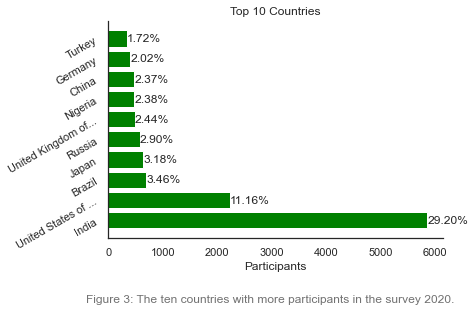

In [16]:
plt.figure(figsize=(6,4))
sns.set_theme(style="white")
bars = plt.barh(topCountries.Country, topCountries.Count, color="green")
plt.xlabel("Count")
plt.yticks(rotation=30)

for c in topCountries.index:
    plt.annotate(
        f"{topCountries.loc[c].Percent*100:.2f}%",
        xy=(bars[c].get_width(), bars[c].get_y()+(bars[c].get_height()/2)),
        va='center',
        ha='left'        
                )
sns.despine(left=False, bottom=False)

plt.xlabel('Participants')
plt.title('Top 10 Countries')

plt.figtext(0.5,-0.1,
            "Figure 3: The ten countries with more participants in the survey 2020.",
            **figtext_arg
           )

plt.show()

In [19]:
fig = px.choropleth(countries, locations="Code",
                    color="Count", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.speed,
                    height=500,
                    template='seaborn',
                    labels = {'Count':'# Responses'}
                   )

fig.update_layout(title={
    'text': "<b>Participating Countries</b>",
    'y': 0.94,
    'x': 0.5,
    'yanchor': 'top',
    'xanchor': 'center',
    'font' : dict (
        family='verdana, arial, sans-serif',
        size = 13,
        color= 'rgba(0,0,0,0.65)'
    )
})

fig.update_layout(annotations=[
    go.layout.Annotation(
        showarrow=False,
        text='Figure 4: Map of number of responses by countries.',
        xanchor='center',
        x=0.5,
        yanchor='bottom',
        y=-0.1,
        font = dict (
            size = 12,
            color= 'rgba(0,0,0,0.55)'
        )
    )
])
fig.show(config={'staticPlot':True})

In [18]:
edu = kaggle2020['Education Level'].fillna('I prefer not to answer').value_counts().reset_index(name="Count").rename(columns={"index":"Level"})
edu = edu.rename(index={0:'b',1:'c',2:'a',3:'e',4:'d',5:'g',6:'f'}).sort_index()

edu['Percent'] = edu.Count/(kaggle2020.shape[0])
#edu